In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data(l):
    data=np.loadtxt(l,delimiter=",",skiprows=1)
    return data

In [3]:
def _init_centroids(X, K):
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K]]
    return centroids
def dist(X, c):
    X_n = np.sum(X**2, axis=1)
    c_n = np.sum(c**2, axis=1)
    X_dot_c = -2 * X @ c.T
    distance = (c_n + X_dot_c) + X_n.reshape((X.shape[0], 1))
    return distance
def nearest(distance):
    classes = np.argmin(distance, axis=1)
    return classes
def updating(X, classes, K):
    n = X.shape[1]
    c = np.zeros((K, n))
    clusters = []
    for i in range(K):
        c_i = X[classes == i]
        clusters.append(c_i)
        c[i] = np.mean(c_i, axis=0)
    return c , clusters

In [4]:
def run_kMeans(X, K, dist, _init_centroids, steps):
    m, n = X.shape
    centroids = _init_centroids(X, K)
    for i in range(steps):
        distance = dist(X, centroids)
        previous_centroids = centroids
        classes = nearest(distance)
        centroids,clusters = updating(X, classes, K)
        if np.array_equal(previous_centroids,centroids):
            break
    n_d = np.zeros((K,n))
    for k in range(K):
        n_d[k] = np.sum(dist(clusters[k],centroids[k].reshape(1,n)))
    cost = np.sum(n_d)
    return centroids, classes ,cost , i

def checking_K(X, max_k, steps, dist):
    cost_list, K_list = [], []
    centroid = []
    for k in range(1, max_k + 1):
        K_list.append(k)
        centroids, classes,cost,i = run_kMeans(X, k, dist, _init_centroids, steps)
        centroid.append(centroids)
        print(f"K-Means cluster: {k} ---- No. of iteration: {i} ---- final distance: {cost}")
        cost_list.append(cost)
    return cost_list, K_list,centroid

In [5]:
def plot(cost, K_list):
    plt.plot(K_list, cost, c="r", label="Cost"),plt.scatter(K_list, cost, c="b")
    plt.xlabel("Number of Clusters (k)"),plt.ylabel("Cost"),plt.title("optimization of No. of centroid: Elbow")
    plt.legend()
    plt.show()

def find_k(cost, K_list):
    first_diff = np.diff(cost)
    second_diff = np.diff(first_diff)
    elbow_index = np.argmax(second_diff) + 2
    optimal_k = K_list[elbow_index - 1]
    return optimal_k

In [6]:
# Example usage
X = load_data("Kmean_dataset.csv")

K-Means cluster: 1 ---- No. of iteration: 1 ---- final distance: 228699852.9856099
K-Means cluster: 2 ---- No. of iteration: 9 ---- final distance: 59094701.797291875
K-Means cluster: 3 ---- No. of iteration: 7 ---- final distance: 30818965.928178564
K-Means cluster: 4 ---- No. of iteration: 5 ---- final distance: 17386586.55222388
K-Means cluster: 5 ---- No. of iteration: 9 ---- final distance: 11952485.278751403
K-Means cluster: 6 ---- No. of iteration: 9 ---- final distance: 12933249.739228837
K-Means cluster: 7 ---- No. of iteration: 9 ---- final distance: 8997952.209806636
K-Means cluster: 8 ---- No. of iteration: 9 ---- final distance: 7745461.022386361
K-Means cluster: 9 ---- No. of iteration: 9 ---- final distance: 8826005.75569609
K-Means cluster: 10 ---- No. of iteration: 7 ---- final distance: 6417804.395036268


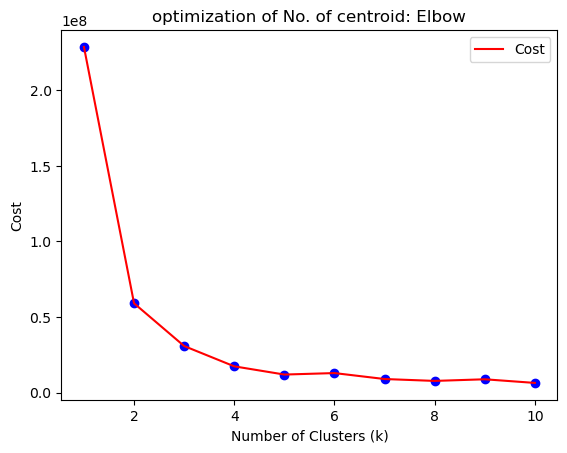

Optimal number of clusters (k): 2


In [8]:
iteration = 10
max_k = 10
cost, K_list,centroid = checking_K(X, max_k, iteration, dist)
plot(cost, K_list)
optimal_k = find_k(cost, K_list)
print(f"Optimal number of clusters (k): {optimal_k}")

In [11]:
test = centroid[optimal_k-1].astype(int)

np.savetxt('kmeans_test_prediction.csv', test, delimiter=',', header='Test target', comments='')